In [2]:
## Python
import os
import random
import sys
import warnings
warnings.filterwarnings('ignore')


## Package
import glob 
import keras
import IPython.display as ipd
import librosa

import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf

Using TensorFlow backend.


In [3]:
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical

from keras.models import Model, Sequential
from keras import optimizers
from keras.layers import Input, Conv1D, Conv2D,BatchNormalization, MaxPooling1D,MaxPooling2D, LSTM, Dense, Activation, Layer,Reshape

from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm_notebook as tqdm

input_duration=3

In [15]:
df=pd.read_csv('dataset.csv', index_col=0)

In [5]:
logspec = np.load('logspec.npy')

In [45]:
X=logspec
y=pd.get_dummies(df.emotion).values

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.1, random_state=42)

In [41]:
input_shape = X_train.shape[1:]

ERROR! Session/line number was not unique in database. History logging moved to new session 175


In [42]:
model = Sequential(name='Audio_CNN_2D')

# LFLB1
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', data_format='channels_last',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
# FC
model.add(Dense(units=num_classes, activation='softmax'))

# Model compilation
opt = optimizers.Adam(lr=0.001, beta_1=0.9,  beta_2=0.999, amsgrad=False)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

ERROR! Session/line number was not unique in database. History logging moved to new session 176


In [44]:
y_train.shape

(1296,)

ERROR! Session/line number was not unique in database. History logging moved to new session 178


In [47]:
num_classes = len(np.unique(np.argmax(y_train, 1)))

In [48]:
batch_size = 8
num_epochs = 100
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('Models/Audio_2DCNN_5L.h5', save_best_only=True, monitor='val_categorical_accuracy', mode='max')
cnnhistory=model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,validation_data=(X_test, y_test), callbacks=[mcp_save, lr_reduce])

Train on 1296 samples, validate on 144 samples
Epoch 1/100
ERROR! Session/line number was not unique in database. History logging moved to new session 180
1296/1296 [==============================] - 158s 122ms/step - loss: 2.0862 - categorical_accuracy: 0.2894 - val_loss: 2.1180 - val_categorical_accuracy: 0.2083
Epoch 2/100
1296/1296 [==============================] - 158s 122ms/step - loss: 1.9275 - categorical_accuracy: 0.3187 - val_loss: 1.5777 - val_categorical_accuracy: 0.4514
Epoch 3/100
1296/1296 [==============================] - 158s 122ms/step - loss: 1.7139 - categorical_accuracy: 0.3704 - val_loss: 3.1872 - val_categorical_accuracy: 0.1597
Epoch 4/100
1296/1296 [==============================] - 158s 122ms/step - loss: 1.6105 - categorical_accuracy: 0.4128 - val_loss: 1.8960 - val_categorical_accuracy: 0.4097
Epoch 5/100
1296/1296 [==============================] - 158s 122ms/step - loss: 1.5529 - categorical_accuracy: 0.4228 - val_loss: 1.6908 - val_categorical_accuracy:

1296/1296 [==============================] - 158s 122ms/step - loss: 0.0966 - categorical_accuracy: 0.9707 - val_loss: 1.1102 - val_categorical_accuracy: 0.7083
Epoch 48/100
1296/1296 [==============================] - 158s 122ms/step - loss: 0.0966 - categorical_accuracy: 0.9691 - val_loss: 0.9649 - val_categorical_accuracy: 0.7014
Epoch 49/100
1296/1296 [==============================] - 158s 122ms/step - loss: 0.1026 - categorical_accuracy: 0.9738 - val_loss: 1.1415 - val_categorical_accuracy: 0.7292
Epoch 50/100
1296/1296 [==============================] - 158s 122ms/step - loss: 0.0739 - categorical_accuracy: 0.9769 - val_loss: 1.0219 - val_categorical_accuracy: 0.7222
Epoch 51/100
1296/1296 [==============================] - 158s 122ms/step - loss: 0.1225 - categorical_accuracy: 0.9560 - val_loss: 1.0208 - val_categorical_accuracy: 0.6875
Epoch 52/100
1296/1296 [==============================] - 158s 122ms/step - loss: 0.0763 - categorical_accuracy: 0.9776 - val_loss: 1.1164 - va

1296/1296 [==============================] - 157s 121ms/step - loss: 0.0297 - categorical_accuracy: 0.9900 - val_loss: 1.1705 - val_categorical_accuracy: 0.7431
Epoch 95/100
1296/1296 [==============================] - 157s 121ms/step - loss: 0.0252 - categorical_accuracy: 0.9923 - val_loss: 1.1982 - val_categorical_accuracy: 0.7083
Epoch 96/100
1296/1296 [==============================] - 157s 121ms/step - loss: 0.0504 - categorical_accuracy: 0.9807 - val_loss: 1.2367 - val_categorical_accuracy: 0.7083
Epoch 97/100
1296/1296 [==============================] - 157s 121ms/step - loss: 0.0338 - categorical_accuracy: 0.9877 - val_loss: 1.2460 - val_categorical_accuracy: 0.7222
Epoch 98/100
1296/1296 [==============================] - 157s 121ms/step - loss: 0.0376 - categorical_accuracy: 0.9853 - val_loss: 1.0700 - val_categorical_accuracy: 0.7500
Epoch 99/100
1296/1296 [==============================] - 157s 121ms/step - loss: 0.0418 - categorical_accuracy: 0.9853 - val_loss: 1.1919 - va

In [49]:
max(cnnhistory.history['val_categorical_accuracy'])

0.7638888955116272

ERROR! Session/line number was not unique in database. History logging moved to new session 181


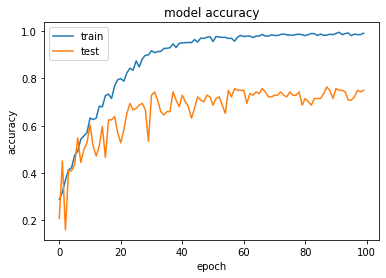

In [50]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['categorical_accuracy'])
plt.plot(cnnhistory.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

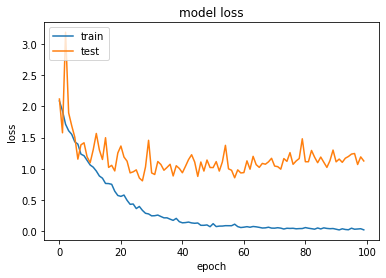

In [51]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
y_pred=model.predict(X_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 183


In [53]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (9,6), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
class_names=['neutral','calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

In [55]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.91      0.80      0.85        25
           2       0.93      0.68      0.79        19
           3       0.30      0.58      0.40        12
           4       0.84      0.89      0.86        18
           5       0.52      0.61      0.56        18
           6       0.85      0.94      0.89        18
           7       0.94      0.68      0.79        25

    accuracy                           0.75       144
   macro avg       0.79      0.75      0.75       144
weighted avg       0.81      0.75      0.77       144



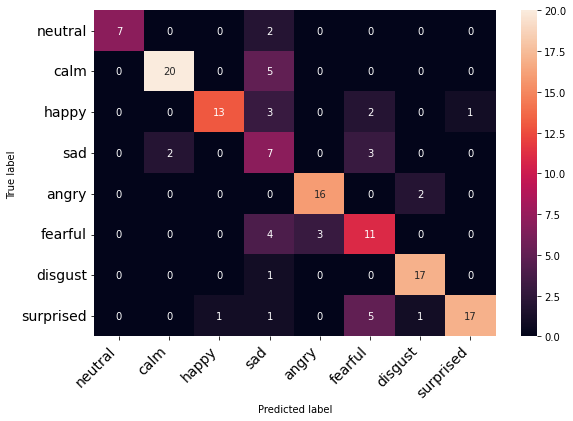

In [56]:
print_confusion_matrix(c, class_names)

In [57]:
import json
model_json = model.to_json()
with open("Models/Audio_2DCNN_LogMelModel_5L.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from keras.models import model_from_json
json_file = open('Models/Audio_2DCNN_LogMelModel_5L.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
from keras.models import load_model
loaded_model.load_weights('Models/Audio_2DCNN_5L.h5')

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)